In [65]:
%matplotlib inline
import random
import time
from sys import exit
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [66]:
learning_rate = 0.01
neurons = [0.0, 0.0]        # Will be initialized in main by test values.
weights = [random.uniform(0, 1), random.uniform(0, 1)]
total_average_errors_raw = []
# Training set creation
test_raw = []
test = []
targets = []       
N = 8 # number of cases in training dataset
R = 10 # range of values from 0 to R
for i in range(N):
    first_raw = randint(1,R)
    second_raw = randint(1,R)
    answer_raw = first_raw * second_raw 
    test_raw.append([first_raw, second_raw, answer_raw])
    
    first = np.log(first_raw)+ 1
    second = np.log(second_raw) + 1
    answer = first + second
    test.append([first, second, answer])
    targets.append(answer)
    
bias = 1
print test
#print targets
print test_raw

[[2.09861228866811, 1.6931471805599454, 3.7917594692280554], [3.3025850929940459, 1.6931471805599454, 4.9957322735539913], [3.3025850929940459, 2.6094379124341005, 5.9120230054281464], [2.6094379124341005, 3.1972245773362196, 5.8066624897703196], [3.3025850929940459, 1.0, 4.3025850929940459], [2.791759469228055, 2.791759469228055, 5.5835189384561099], [1.0, 3.0794415416798357, 4.0794415416798362], [2.09861228866811, 2.09861228866811, 4.19722457733622]]
[[3, 2, 6], [10, 2, 20], [10, 5, 50], [5, 9, 45], [10, 1, 10], [6, 6, 36], [1, 8, 8], [3, 3, 9]]


ITERATION 1
1)
input  : [3, 2]
target : [6]
output :  2.85
error  :  3.15
------------------------------------------------
2)
input  : [10, 2]
target : [20]
output :  8.27
error  :  11.73
------------------------------------------------
3)
input  : [10, 5]
target : [50]
output :  55.52
error  :  -5.52
------------------------------------------------
4)
input  : [5, 9]
target : [45]
output :  73.53
error  :  -28.53
------------------------------------------------
5)
input  : [10, 1]
target : [10]
output :  5.87
error  :  4.13
------------------------------------------------
6)
input  : [6, 6]
target : [36]
output :  53.14
error  :  -17.14
------------------------------------------------
7)
input  : [1, 8]
target : [8]
output :  28.99
error  :  -20.99
------------------------------------------------
8)
input  : [3, 3]
target : [9]
output :  3.65
error  :  5.35
------------------------------------------------
1) LS error raw     : 4.970
2) LS error raw     : 68.844
3) LS error raw     : 1

SystemExit: 

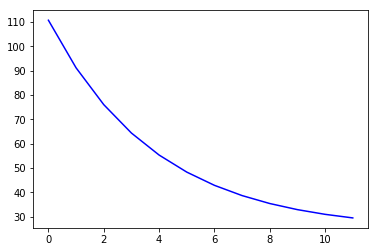

In [67]:
def output(threshold):      # Will be 1, since we will train with positive numbers
    global neurons, weights
    s = neurons[0] * weights[0] + neurons[1] * weights[1] + bias
    if s > threshold:
        return s
    return 0

iterations = 0
res = [] # results
while 1:
    print("ITERATION %d" % (iterations+1))
    for i in range(len(test)):  # Loop through the training dataset
        neurons[0] = test[i][0] # Give input values 
        neurons[1] = test[i][1] 
        out = output(2)
        res.append(out)
        # Weights adjusted according to the formula: 
        # Wnew = Wold + learning_rate * [Target - Output] * input
        weights[0] = weights[0] + learning_rate * (test[i][2] - out) * neurons[0]
        weights[1] = weights[1] + learning_rate * (test[i][2] - out) * neurons[1]
        # Adjust bias based on the formula:
        # Bias_new = Bias_old + (Target - Actual)
        bias = bias + test[i][2] - out
      
        # Print output
        print("%d)" % (i+1))
        print("input  : [%d, %d]" % (test_raw[i][0], test_raw[i][1]))
        print("target : [%d]" % test_raw[i][2])
        print("output :  %.2f" % np.exp(out-2))
        print("error  :  %.2f" % (test_raw[i][2] - np.exp(out-2)))
        print("------------------------------------------------")
        
    # Termination condition: when average error sufficiently low
    errors_raw = []
    average_error_raw = 0
    average_error = 0
    for i in range(len(res)):
        # Keep track of Least Squares Errors (LSE)
        current_error = 0.5 * ((res[i] - targets[i]) ** 2) 
        #errors.append(current_error)
        average_error = average_error + current_error/len(res) 
        
        # Keep track of 'raw' errors for graphing
        current_error_raw = 0.5 * ((np.exp(res[i]-2) - test_raw[i][2])** 2)
        errors_raw.append(current_error_raw)
        average_error_raw = average_error_raw + current_error_raw/len(res)
        print("%d) LS error raw     : %.3f" % (i+1, current_error_raw))
       
    total_average_errors_raw.append(average_error_raw)
    print("=> Average LS Error : %.3f\n" % average_error_raw)
   
    # if the calculated results are very near the real results, stop and print final results
    acceptable_error = 0.1
    if average_error < acceptable_error: 
        print("Total iterations : %d" % (iterations+1))
        print("Final Weight 1   : %f" % weights[0])
        print("Final Weight 2   : %f" % weights[1])
        print("Final Bias       : %f" % bias)
        #print(iterations+1)
        #print(len(total_average_errors_raw))
        
        plt.plot(np.arange(iterations+1), total_average_errors_raw, color='b')
        print("\n>> x-axis : number of iterations\n>> y-axis : avg. error")
        exit()
        
    iterations += 1
    res = []
    print("Weight 1: %.4f\nWeight 2: %.4f" % (weights[0], weights[1]))
    print("=====================================================================\n")
